In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = "26"
#plt.rcParams['savefig.facecolor'] = "0.5"
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [2]:
bColor = "red"
oColor = "green"
hColor = "blue"

In [3]:
result = pd.read_csv(r"Substitution/news_vary_n.csv")

In [4]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Blom_runtime,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored
0,adressa=10_ballot=4,10,2792,4,sor-trondelag,0,0,0.0,0.0,0.006924,...,0.717097,1,1,1,0,47,1,48,0,1
1,adressa=10_ballot=4,10,2792,4,oslo,0,0,0.0,0.0,0.009441,...,0.692253,1,1,1,0,47,1,48,0,1
2,adressa=10_ballot=4,10,2792,4,akershus,0,0,0.0,0.0,0.006290,...,0.557745,1,1,1,0,47,1,48,0,1
3,adressa=10_ballot=4,10,2792,4,hedmark,0,0,0.0,0.0,0.006625,...,0.588488,1,1,1,0,47,1,48,0,1
4,adressa=10_ballot=4,10,2792,4,florida,0,0,0.0,0.0,0.005262,...,0.636996,1,1,1,0,47,1,48,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,adressa=9_ballot=4,9,2386,4,telemark,0,0,0.0,0.0,0.004393,...,0.308786,1,1,1,0,38,1,39,0,1
1400,adressa=9_ballot=4,9,2386,4,aust-agder,0,0,0.0,0.0,0.004046,...,0.319358,1,1,1,0,38,1,39,0,1
1401,adressa=9_ballot=4,9,2386,4,oppland,0,0,0.0,0.0,0.003845,...,0.292647,1,1,1,0,38,1,39,0,1
1402,adressa=9_ballot=4,9,2386,4,hordaland,0,0,0.0,0.0,0.004467,...,0.338375,1,1,1,0,38,1,39,0,1


In [5]:
result['margin_difference'] = result['heuristicV1_margin'] - result['Blom_margin']

In [6]:
#result = result[result['Blom_margin'] > 0]
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,margin_difference
0,adressa=10_ballot=4,10,2792,4,sor-trondelag,0,0,0.0,0.0,0.006924,...,1,1,1,0,47,1,48,0,1,0.0
1,adressa=10_ballot=4,10,2792,4,oslo,0,0,0.0,0.0,0.009441,...,1,1,1,0,47,1,48,0,1,0.0
2,adressa=10_ballot=4,10,2792,4,akershus,0,0,0.0,0.0,0.006290,...,1,1,1,0,47,1,48,0,1,0.0
3,adressa=10_ballot=4,10,2792,4,hedmark,0,0,0.0,0.0,0.006625,...,1,1,1,0,47,1,48,0,1,0.0
4,adressa=10_ballot=4,10,2792,4,florida,0,0,0.0,0.0,0.005262,...,1,1,1,0,47,1,48,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,adressa=9_ballot=4,9,2386,4,telemark,0,0,0.0,0.0,0.004393,...,1,1,1,0,38,1,39,0,1,0.0
1400,adressa=9_ballot=4,9,2386,4,aust-agder,0,0,0.0,0.0,0.004046,...,1,1,1,0,38,1,39,0,1,0.0
1401,adressa=9_ballot=4,9,2386,4,oppland,0,0,0.0,0.0,0.003845,...,1,1,1,0,38,1,39,0,1,0.0
1402,adressa=9_ballot=4,9,2386,4,hordaland,0,0,0.0,0.0,0.004467,...,1,1,1,0,38,1,39,0,1,0.0


In [7]:
result.columns

Index(['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'margin_difference'],
      dtype='object')

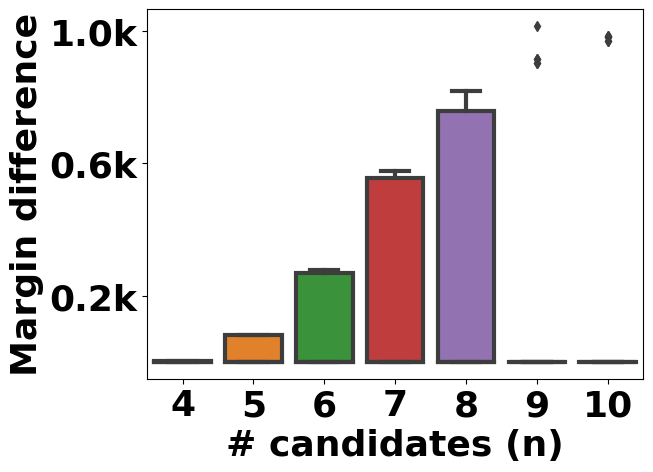

<Figure size 640x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
box_plot = sns.boxplot(x='Number_Of_Candidates', y='margin_difference', data=result,linewidth=3)
plt.xlabel("# candidates (n)")
plt.ylabel("Margin difference")
#plt.title("Colors vs Values") # You can comment this line out if you don't need title
ax.set_yticks([200,600,1000],['0.2k','0.6k','1.0k'])
plt.show(box_plot)
plt.tight_layout()
#fig = plt.get_figure()
fig.savefig('Figures/substitution_news_b=4_vary_n_margin.pdf',dpi=2024,bbox_inches='tight')

In [9]:
avg = result.groupby(['Number_Of_Candidates'])['Upper_Bound','heuristicV1_margin','Our_margin','Blom_margin','heuristicV1_runtime','Our_runtime','Blom_runtime','Blom_number_node_explored','Our_number_node_explored','Our_number_LPS','Blom_number_LPS'].mean()

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [10]:
avg.to_csv('tempAvgmovie=10.csv')

In [11]:
avgDf = pd.read_csv('tempAvgmovie=10.csv')
avgDf

,Number_Of_Candidates,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,Our_runtime,Blom_runtime,Blom_number_node_explored,Our_number_node_explored,Our_number_LPS,Blom_number_LPS
0,4,2.625000,2.625000,1.500000,1.500000,0.000058,0.007837,0.021837,8.333333,3.333333,2.333333,7.333333
1,5,72.303371,72.303371,36.370787,36.370787,0.000106,0.036271,0.056456,15.168539,8.426966,7.426966,14.168539
2,6,243.571429,243.571429,121.919414,121.919414,0.000189,0.060681,0.091468,21.926740,12.586081,11.586081,20.926740
3,7,508.891304,508.891304,254.590580,254.590580,0.000396,0.162227,0.293160,48.786232,36.286232,27.373188,47.786232
4,8,734.110345,734.110345,367.175862,367.175862,0.000781,0.330579,1.406721,140.448276,124.931034,51.517241,139.448276
5,9,332.500000,332.500000,166.285714,166.285714,0.003940,0.872395,31.211247,1111.750000,1179.785714,112.392857,1110.750000
6,10,392.066667,392.066667,196.066667,196.066667,0.006026,0.892221,39.439951,1181.466667,1376.000000,71.266667,1180.466667


In [17]:
392.066667/196.066667

1.999659977899252

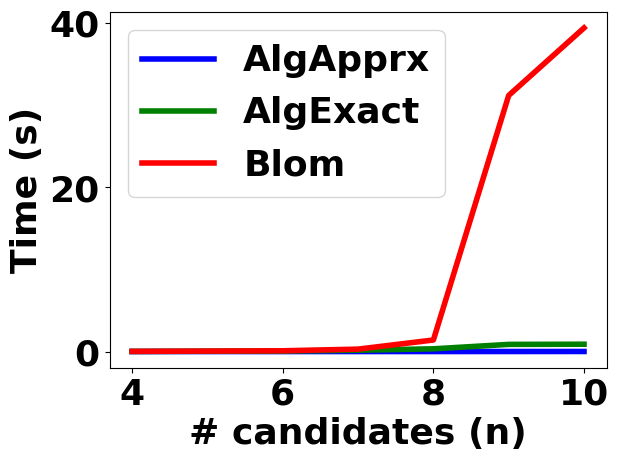

In [12]:
#import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_runtime'].to_list()
u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y,color=hColor,linewidth=4)
plt.plot(x,z,color=oColor,linewidth=4)
plt.plot(x,u,color=bColor,linewidth=4)
plt.tight_layout()
# create an index for each tick position

plt.ylabel('Time (s)')
plt.xlabel('# candidates (n)')
#plt.yticks([0,5,10,15,20], ['0','5','10','15','20'])

plt.legend(["AlgApprx","AlgExact","Blom"],loc='upper left')
fig.savefig(r"Figures/substitution_news_b=4_vary_n_runtime.pdf",dpi=2024,bbox_inches='tight')

In [15]:
y

[2.333333333333333,
 7.426966292134831,
 11.586080586080586,
 27.3731884057971,
 51.51724137931034,
 112.39285714285714,
 71.26666666666667]

In [16]:
z

[7.333333333333333,
 14.168539325842696,
 20.926739926739927,
 47.78623188405797,
 139.44827586206895,
 1110.75,
 1180.4666666666667]

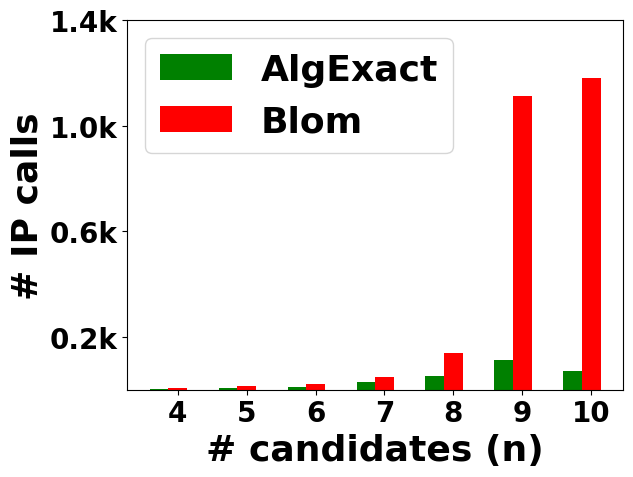

In [13]:
import numpy as np

N = len(x)
ind = np.arange(N)  # the x locations for the groups
width = 0.27     # the width of the bars

fig = plt.figure()
plt.tight_layout()
ax = fig.add_subplot(111)

x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['Our_number_LPS'].to_list()
z = avgDf['Blom_number_LPS'].to_list()
ticklabels = []
for i in x:
    #s = "n="+str(i)
    s = str(i)
    ticklabels.append(s)


rects1 = ax.bar(ind, y, width, color=oColor)
rects2 = ax.bar(ind+width, z, width, color=bColor)
#rects3 = ax.bar(ind+width*2, u, width, color='b')

ax.set_ylabel('# IP calls')
ax.set_xlabel('# candidates (n)')
ax.set_xticks(ind+width)
ax.set_xticklabels( ticklabels )
#ax.set_yticks([1000,2000,3000],['1k','2k','3k'])
ax.set_yticks([200,600,1000,1400],['0.2k','0.6k','1.0k','1.4k'])
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend( (rects1[0], rects2[0]), ('AlgExact', 'Blom') )
#plt.ylim(1700,1850)
plt.savefig('Figures/substitution_news_b=4_vary_n_numberlps.pdf',dpi=2024,bbox_inches='tight')
plt.show()

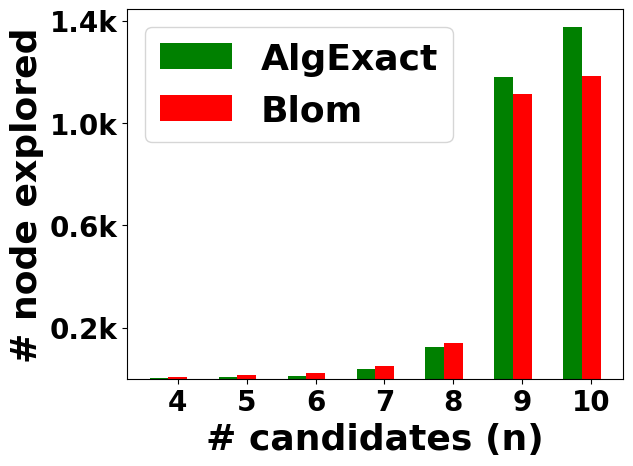

In [94]:
import numpy as np

N = len(x)
ind = np.arange(N)  # the x locations for the groups
width = 0.27     # the width of the bars

fig = plt.figure()
plt.tight_layout()
ax = fig.add_subplot(111)

x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['Our_number_node_explored'].to_list()
z = avgDf['Blom_number_node_explored'].to_list()
ticklabels = []
for i in x:
    s = str(i)
    ticklabels.append(s)


rects1 = ax.bar(ind, y, width, color=oColor)
rects2 = ax.bar(ind+width, z, width, color=bColor)
#rects3 = ax.bar(ind+width*2, u, width, color='b')

ax.set_ylabel('# node explored')
ax.set_xlabel('# candidates (n)')
ax.set_xticks(ind+width)
ax.set_xticklabels( ticklabels )
ax.set_yticks([200,600,1000,1400],['0.2k','0.6k','1.0k','1.4k'])
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend( (rects1[0], rects2[0]), ('AlgExact', 'Blom') )
#plt.ylim(1700,1850)
plt.savefig('Figures/substitution_news_b=4_vary_n_nodeexplored.pdf',dpi=2024,bbox_inches='tight')
plt.show()

In [95]:
import matplotlib.pyplot as plt
#plt.ylim([0,2])
box_plot = sns.boxplot(x='Number_Of_Candidates', y='Margin difference percent', data=result)
fig = box_plot.get_figure()
fig.savefig('Figure/Addition_news_margin_b=4_vary_n.pdf',dpi=1000)

ValueError: Could not interpret input 'Margin difference percent'

In [ ]:

# #create long-form data
# df = pd.DataFrame({'points': [7, 8, 9, 12, 14, 5, 6, 6, 8, 11, 8, 9, 11, 13, 17],
#                    'team': np.repeat(['A', 'B', 'C'], 5)})


In [ ]:
# sns.boxplot(x='team', y='points', data=df)

In [ ]:
avg = result.groupby(['Max_Ballot_length'])['Upper_Bound','heuristicV1_margin','Our_margin','Blom_margin','heuristicV1_runtime','Our_runtime','Blom_runtime','Blom_number_node_explored','Our_number_node_explored'].mean()

In [ ]:
avg

In [30]:
avg.to_csv('Addition_movie_lens_result_n=10.csv')

In [31]:
avgDf = pd.read_csv('Addition_movie_lens_result_n=10.csv')
avgDf

,Max_Ballot_length,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,Our_runtime,Blom_runtime,Blom_number_node_explored,Our_number_node_explored
0,4,668.421533,668.421533,575.589416,575.589416,0.005568,4.264893,6.620505,604.412409,604.412409


In [218]:
avgDf.columns = ['Max_Ballot_length','Upper_Bound', 'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime','Blom_number_node_explored','Our_number_node_explored']

In [219]:
avgDf['Max_Ballot_length'].to_list()

[2, 3, 4, 5, 6, 7, 8, 9, 10]

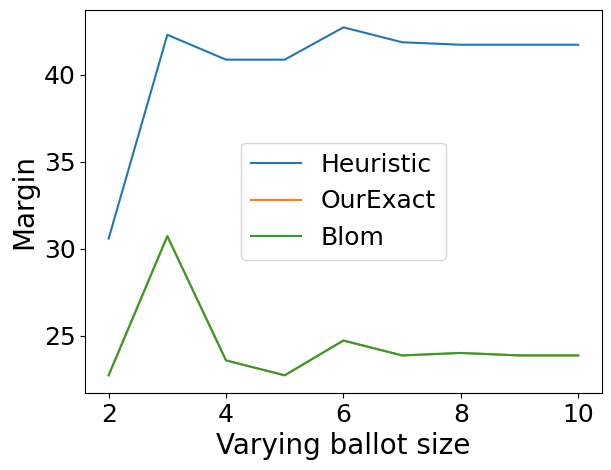

In [220]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()

x  = avgDf['Max_Ballot_length'].to_list()
y = avgDf['heuristicV1_margin'].to_list()
z = avgDf['Our_margin'].to_list()
u = avgDf['Blom_margin'].to_list()


plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,u)

# create an index for each tick position

plt.ylabel('Margin',fontsize=20)
plt.xlabel('Varying ballot size',fontsize=20)

plt.legend(["Heuristic","OurExact","Blom"],fontsize=18,loc='center')
fig.savefig("Addition_movie_lens_margin_n=10_vary_b.pdf")
plt.show()

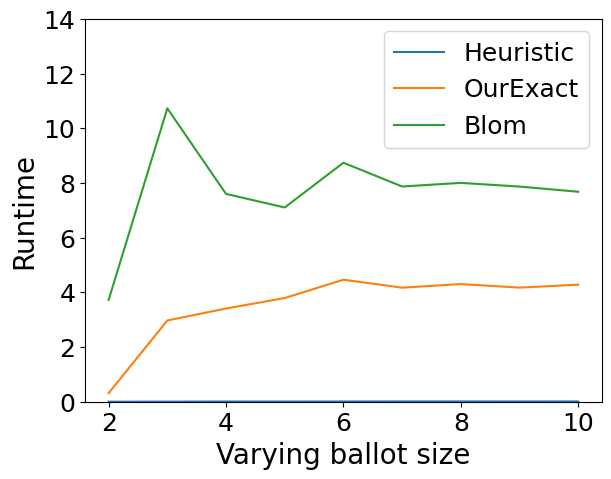

In [221]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()

x  = avgDf['Max_Ballot_length'].to_list()
y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_runtime'].to_list()
u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,u)

# create an index for each tick position

plt.ylabel('Runtime',fontsize=20)
plt.xlabel('Varying ballot size',fontsize=20)
#plt.yticks([0,2,4,6,8,10,12,14], ['0','2','4','6','8','10','12','14'])
plt.ylim(0,14)
plt.legend(["Heuristic","OurExact","Blom"],fontsize=18,loc='upper right')
fig.savefig("Addition_movie_lens_runtime_n=10_vary_b.pdf")
plt.show()

In [222]:

#avgDf = avgDf.drop(avgDf.index[0])

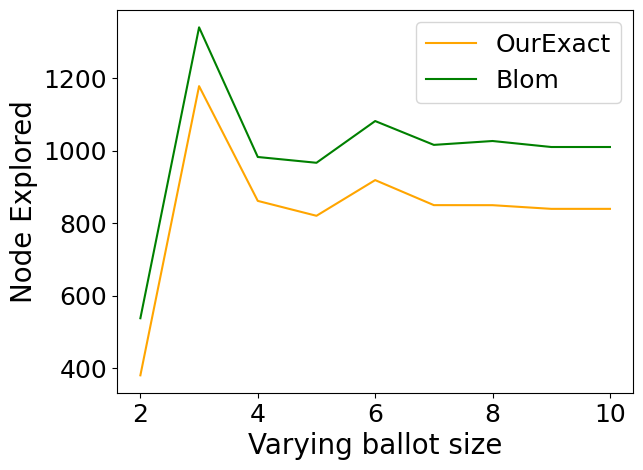

In [223]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()

x  = avgDf['Max_Ballot_length'].to_list()
y = avgDf['Our_number_node_explored'].to_list()
z = avgDf['Blom_number_node_explored'].to_list()
#u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y,color='orange')
plt.plot(x,z,color='green')
#plt.plot(x,u)

# create an index for each tick position

plt.ylabel('Node Explored',fontsize=20)
plt.xlabel('Varying ballot size',fontsize=20)
#plt.yticks([0,2,4,6,8,10,12,14], ['0','2','4','6','8','10','12','14'])
#plt.ylim(0,14)
plt.legend(["OurExact","Blom"],fontsize=18,loc='upper right')
fig.savefig("Addition_movie_lens_node_explored_n=10_vary_b.pdf")
plt.show()

In [ ]:
########################################### vary n #############################################################################

In [32]:
result = pd.read_csv(r"Addiiton_adressa_boxplot.csv")

In [33]:
result

,Unnamed: 0,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,...,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,Our_Time_distanceTo,Blom_Time_distanceTo,Our_Time_lbcall,Blom_Time_lbcall
0,10,adressa=4_ballot=4,4,457,4,virginia,38,38,38,38,...,0,5,6,6,0.000316,0,0.001179,0.054172,0.000105,0.000438
1,12,adressa=4_ballot=4,4,457,4,new hampshire,113,113,104,104,...,0,8,9,9,0.000406,1,0.002059,0.031041,0.000103,0.000744
2,15,adressa=4_ballot=4,4,457,4,rio grande do norte,25,25,5,5,...,0,12,14,14,0.001310,1,0.004929,0.024185,0.000209,0.000990
3,25,adressa=4_ballot=4,4,457,4,georgia,38,38,38,38,...,0,5,6,6,0.000330,0,0.001230,0.005182,0.000126,0.000457
4,31,adressa=4_ballot=4,4,457,4,faro,38,38,38,38,...,0,5,6,6,0.000396,0,0.001516,0.007381,0.000131,0.000542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1282,adressa=8_ballot=4,8,3246,4,espirito santo,1481,1481,1481,1481,...,0,1970,1971,1971,2.204612,206,13.738980,22.674971,0.002579,1.770755
544,1283,adressa=8_ballot=4,8,3246,4,valle del cauca,499,499,499,499,...,0,1335,1588,1588,1.927678,0,8.404814,11.004128,0.002397,1.623740
545,1284,adressa=8_ballot=4,8,3246,4,puerto rico,1481,1481,499,499,...,0,2923,2924,2924,3.616570,238,19.873486,30.068558,0.012844,2.930251
546,1285,adressa=8_ballot=4,8,3246,4,huelva,1487,1487,1439,1439,...,0,1789,1790,1790,2.014206,174,12.555670,20.071913,0.002712,1.609556


In [34]:
result.columns

Index(['Unnamed: 0', 'Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'Our_Time_distanceTo',
       'Blom_Time_distanceTo', 'Our_Time_lbcall', 'Blom_Time_lbcall'],
      dtype='object')

In [35]:
avg = result.groupby(['Number_Of_Candidates'])['Upper_Bound','heuristicV1_margin','Our_margin','Blom_margin','heuristicV1_runtime','Our_runtime','Blom_runtime','Blom_number_node_explored','Our_number_node_explored','Our_Time_distanceTo','Blom_Time_distanceTo'].mean()

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [36]:
avg

,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,Our_runtime,Blom_runtime,Blom_number_node_explored,Our_number_node_explored,Our_Time_distanceTo,Blom_Time_distanceTo
Number_Of_Candidates,,,,,,,,,,,
4,51.488889,51.488889,37.266667,37.266667,0.000408,0.003562,0.019779,8.322222,8.322222,0.002380,0.018212
5,283.017094,283.017094,268.683761,268.683761,0.001374,0.053289,0.154483,41.068376,41.068376,0.043455,0.140844
6,526.178862,526.178862,465.349593,465.349593,0.003775,0.403325,0.669374,131.471545,131.471545,0.332303,0.593943
7,1025.904762,1025.904762,859.944444,859.944444,0.007340,2.279998,3.562910,476.269841,476.269841,1.909484,3.155601
8,1462.652174,1462.652174,1250.456522,1250.456522,0.015919,21.670840,33.444812,2711.771739,2711.771739,18.486905,29.957593


In [37]:
avg.to_csv(r'Addition_news_b=4_int1.csv')

In [38]:
avgDf = pd.read_csv(r'Addition_news_b=4_int1.csv')
avgDf

,Number_Of_Candidates,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,Our_runtime,Blom_runtime,Blom_number_node_explored,Our_number_node_explored,Our_Time_distanceTo,Blom_Time_distanceTo
0,4,51.488889,51.488889,37.266667,37.266667,0.000408,0.003562,0.019779,8.322222,8.322222,0.002380,0.018212
1,5,283.017094,283.017094,268.683761,268.683761,0.001374,0.053289,0.154483,41.068376,41.068376,0.043455,0.140844
2,6,526.178862,526.178862,465.349593,465.349593,0.003775,0.403325,0.669374,131.471545,131.471545,0.332303,0.593943
3,7,1025.904762,1025.904762,859.944444,859.944444,0.007340,2.279998,3.562910,476.269841,476.269841,1.909484,3.155601
4,8,1462.652174,1462.652174,1250.456522,1250.456522,0.015919,21.670840,33.444812,2711.771739,2711.771739,18.486905,29.957593


In [39]:
avgDf.columns = ['Number_Of_Candidates','Upper_Bound', 'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime','Blom_number_node_explored','Our_number_node_explored','Our_Time_distanceTo','Blom_Time_distanceTo']

In [40]:
# import matplotlib.pyplot as plt
# #plt.rcParams.update({'font.size': 18})
# fig, ax = plt.subplots(nrows=1, ncols=1)
# fig.tight_layout()


# x  = avgDf['Number_Of_Candidates'].to_list()
# y = avgDf['heuristicV1_margin'].to_list()
# z = avgDf['Our_margin'].to_list()
# u = avgDf['Blom_margin'].to_list()


# plt.plot(x,y)
# plt.plot(x,z)
# plt.plot(x,u)

# # create an index for each tick position

# plt.ylabel('Margin',fontsize=18)
# plt.xlabel('Varying #candidates',fontsize=18)
# #plt.yticks([0,5,10,15,20], ['0','5','10','15','20'])

# plt.legend(["Heuristic","OurExact","Blom"],fontsize=18,loc='center')
# fig.savefig("Figure/Addition_books_margin_b=4_vary_n.pdf")

In [41]:
# yvals = [math.ceil(x) for x in result['heuristicV1_margin'].to_list()] 
# zvals = [math.ceil(x) for x in result['Our_margin'].to_list()]
# kvals =  [math.ceil(x) for x in result['Blom_margin'].to_list()]
# ticklabels = tuple(result['Number_Of_Candidates'].to_list())
# ticklabels

In [42]:
x  = avgDf['Number_Of_Candidates'].to_list()

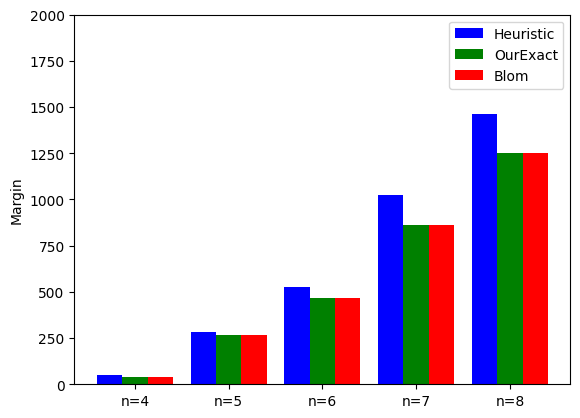

In [46]:
import numpy as np
import matplotlib.pyplot as plt
N = len(x)
ind = np.arange(N)  # the x locations for the groups
width = 0.27     # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['heuristicV1_margin'].to_list()
z = avgDf['Our_margin'].to_list()
u = avgDf['Blom_margin'].to_list()
ticklabels = []
for i in x:
    s = "n="+str(i)
    ticklabels.append(s)


rects1 = ax.bar(ind, y, width, color=hColor)
rects2 = ax.bar(ind+width, z, width, color=oColor)
rects3 = ax.bar(ind+width*2, u, width, color=bColor)

ax.set_ylabel('Margin')
ax.set_xticks(ind+width)
ax.set_xticklabels( ticklabels )
ax.tick_params(axis='both', which='major', labelsize=10)

ax.legend( (rects1[0], rects2[0], rects3[0]), ('Heuristic', 'OurExact', 'Blom') )
plt.ylim(0,2000)
plt.savefig('Figure/Addition_news_margin_b=4_vary_n.pdf',dpi=1000)
plt.show()

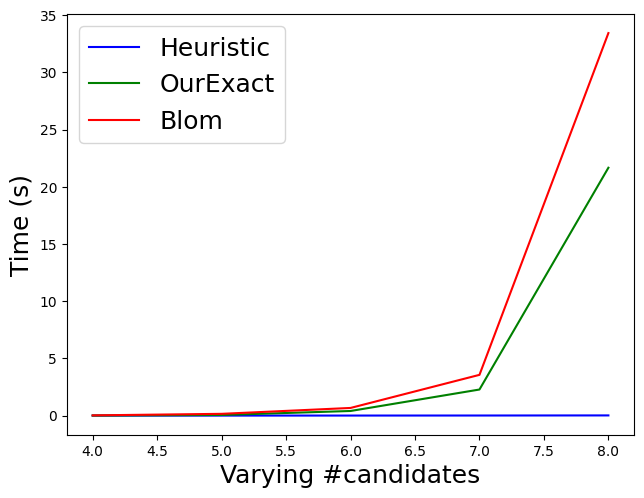

In [47]:
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_runtime'].to_list()
u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y,color=hColor)
plt.plot(x,z,color=oColor)
plt.plot(x,u,color=bColor)

# create an index for each tick position

plt.ylabel('Time (s)',fontsize=18)
plt.xlabel('Varying #candidates',fontsize=18)
#plt.yticks([0,5,10,15,20], ['0','5','10','15','20'])

plt.legend(["Heuristic","OurExact","Blom"],fontsize=18,loc='upper left')
fig.savefig(r"Figure/Addition_news_runtime_b=4_vary_n.pdf",dpi=1000)

In [61]:
# import matplotlib.pyplot as plt

# #plt.rcParams.update({'font.size': 18})
# fig, ax = plt.subplots(nrows=1, ncols=1)
# fig.tight_layout()


# x  = avgDf['Number_Of_Candidates'].to_list()
# y = avgDf['Our_number_node_explored'].to_list()
# z = avgDf['Blom_number_node_explored'].to_list()
# #u = avgDf['Blom_runtime'].to_list()


# plt.plot(x,y)
# plt.plot(x,z)
# #plt.plot(x,u)

# # create an index for each tick position

# plt.ylabel('# Node explored',fontsize=18)
# plt.xlabel('Varying #candidates',fontsize=18)
# #plt.yticks([0,5,10,15,20], ['0','5','10','15','20'])

# plt.legend(["OurExact","Blom"],fontsize=18,loc='upper left')
# fig.savefig(r"Figure/Addition_books_node_explored_b=4_vary_n.pdf")

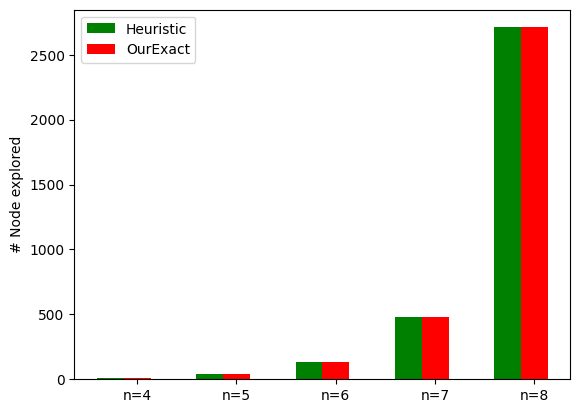

In [48]:
import numpy as np

N = len(x)
ind = np.arange(N)  # the x locations for the groups
width = 0.27     # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['Our_number_node_explored'].to_list()
z = avgDf['Blom_number_node_explored'].to_list()
ticklabels = []
for i in x:
    s = "n="+str(i)
    ticklabels.append(s)


rects1 = ax.bar(ind, y, width, color=oColor)
rects2 = ax.bar(ind+width, z, width, color=bColor)
#rects3 = ax.bar(ind+width*2, u, width, color='b')

ax.set_ylabel('# Node explored')
ax.set_xticks(ind+width)
ax.set_xticklabels( ticklabels )
ax.tick_params(axis='both', which='major', labelsize=10)

ax.legend( (rects1[0], rects2[0]), ('Heuristic', 'OurExact') )
#plt.ylim(1700,1850)
plt.savefig('Figure/Addition_news_node_explored_b=4_vary_n.pdf',dpi=1000)
plt.show()

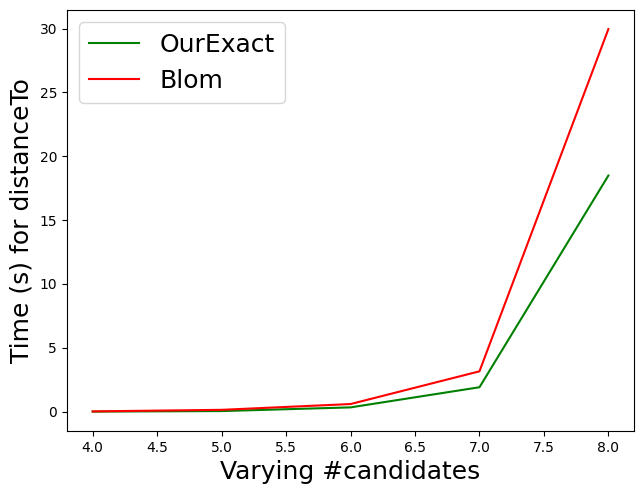

In [49]:
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Number_Of_Candidates'].to_list()
#y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_Time_distanceTo'].to_list()
u = avgDf['Blom_Time_distanceTo'].to_list()


#plt.plot(x,y)
plt.plot(x,z,color=oColor)
plt.plot(x,u,color=bColor)

# create an index for each tick position

plt.ylabel('Time (s) for distanceTo',fontsize=18)
plt.xlabel('Varying #candidates',fontsize=18)
#plt.yticks([0,5,10,15,20], ['0','5','10','15','20'])

plt.legend(["OurExact","Blom"],fontsize=18,loc='upper left')
fig.savefig(r"Figure/Addition_news_runtime_distanceTo_b=4_vary_n.pdf",dpi=1000)